# Fourier Transform survival kit

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
import scipy
import IPython.display as ipd

### Toy example

In [2]:
# import specific functions for FFT
from scipy.fft import rfft, rfftfreq

Composing signal of 1000 points sampled at 100 Hz (=> duration 10.0 seconds), with frequencies 3 and 40 Hz


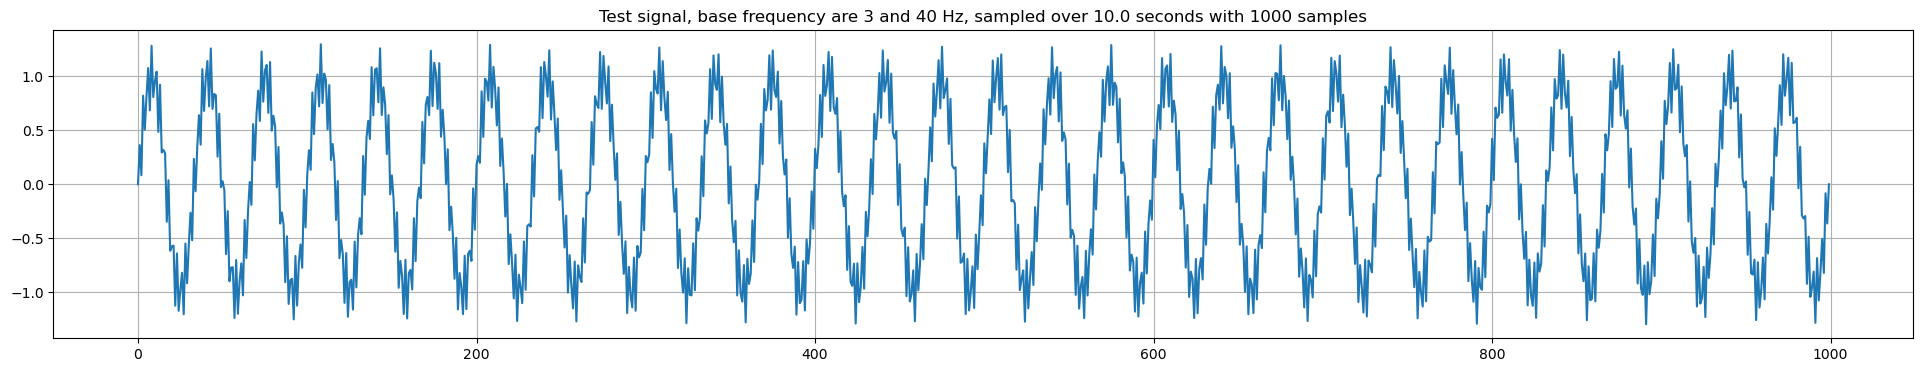

In [3]:
# paramètres of the test sinusoïde
N = 1000  # number of samples (N)
fe = 100 # fréquence échantillonage (Hz)
duration = N/fe  # durée du signal (seconds)

# generate sinusoïdes
f1 = 3  # sine wave frequency in hz
f2 = 40  # sine wave n°2 < fe/2
x = 1*np.sin(2*np.pi*f1*np.linspace(start=0, stop=duration, num=N)) + 0.3*np.sin(2*np.pi*f2*np.linspace(start=0, stop=duration, num=N))

print(f"Composing signal of {N} points sampled at {fe} Hz (=> duration {duration} seconds), with frequencies {f1} and {f2} Hz")

# display synthetic signal
fig, ax = plt.subplots(figsize=(24,4))
ax.plot(x)
ax.grid(True)
ax.set_title(f'Test signal, base frequency are {f1} and {f2} Hz, sampled over {duration} seconds with {N} samples')
plt.show()

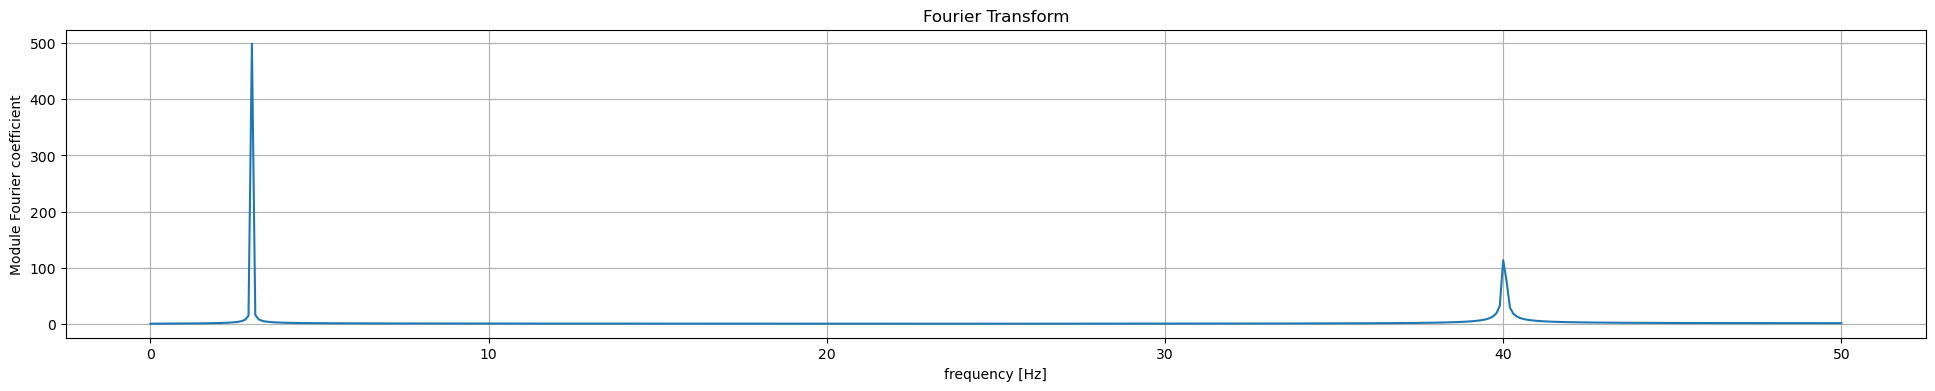

argmax frequency : 3.0 Hz
There are 1000 samples at f_sampling = 100 Hz
The frequencies are computed between -50.0 and 50.0 Hz
Only the physical frequencies are observed up to 50.0 Hz
The frequency resolution is fe/N = 0.1 Hz


In [4]:
# transformée de Fourier
# NB : rfft et rfftfreq travaillent sur 0:N//2, ie fréquences positives
yf = rfft(x)   # calcule les coefficients complexes 
xf = rfftfreq(N) # calcule les fréquences correspondantes

# xf[k] is the DFT for the physical frequency k*fe/N (with -N/2 <= k <= N/2)
# one can only observe up to fe/2 (Nyquist theorem)
# ===> we observe between -fe/2 and fe/2 with resolution fe/N

fig, ax = plt.subplots(figsize=(24,4))
ax.plot(xf * fe, np.abs(yf))  # Noter le *fe pour retrouver le domaine de fréquence originel, et le module complexe de yf
ax.set_title(f'Fourier Transform')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Module Fourier coefficient')
ax.grid(True)
plt.show()

# vérification :-)
print(f'argmax frequency : {xf[np.argmax(np.abs(yf))] * fe} Hz')

# shapes
print(f'There are {N} samples at f_sampling = {fe} Hz')
print(f'The frequencies are computed between {-fe/2} and {fe/2} Hz')
print(f'Only the physical frequencies are observed up to {fe/2} Hz')
print(f'The frequency resolution is fe/N = {fe/N} Hz')

### Example : signal, with period = 1 year

Composing signal of 1000 points sampled at 365 samples/year (=> duration 2.74 years), with frequencies 52.1, 12.2, 1.0 samples/year


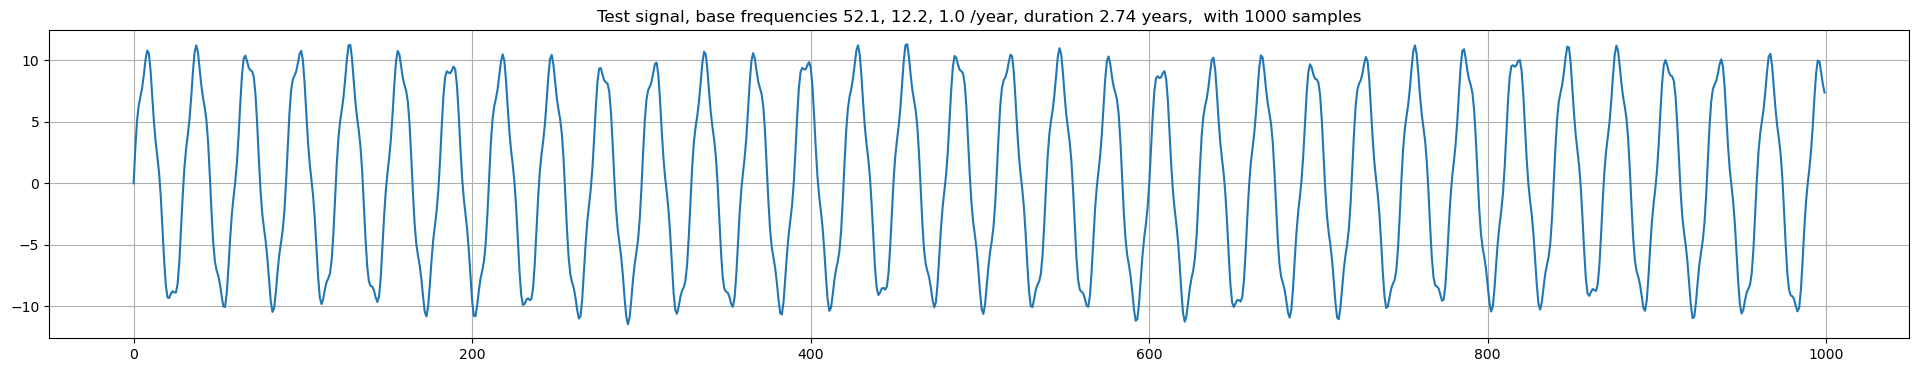

In [56]:
# Example : period = 1 year

# paramètres of the test sinusoïde
N = 1000  # number of samples (N)
fe = 365 # fréquence échantillonage (Hz) : samples per period (here, days per year)
duration = N/fe  # durée du signal (here, in periods)

# generate sinusoïdes
f1, a1 = (365/7), 1 # weekly component (7 days) - ie 52 cycles per year
f2, a2 = (365/30), 10  # monthly component (30 days) - ie 12 cycles per year
f3, a3 = (365/365), 0.5  # yearly component (365 days) - ie 1 cycle per year
ts = np.linspace(start=0, stop=duration, num=N)
x = a1*np.sin(2*np.pi*f1*ts) + a2*np.sin(2*np.pi*f2*ts) + a3*np.sin(2*np.pi*f3*ts)

print(f"Composing signal of {N} points sampled at {fe} samples/year (=> duration {duration:.2f} years), with frequencies {f1:.1f}, {f2:.1f}, {f3:.1f} samples/year")

# display synthetic signal
fig, ax = plt.subplots(figsize=(24,4))
ax.plot(x)
ax.grid(True)
ax.set_title(f'Test signal, base frequencies {f1:.1f}, {f2:.1f}, {f3:.1f} /year, duration {duration:.2f} years,  with {N} samples')
plt.show()

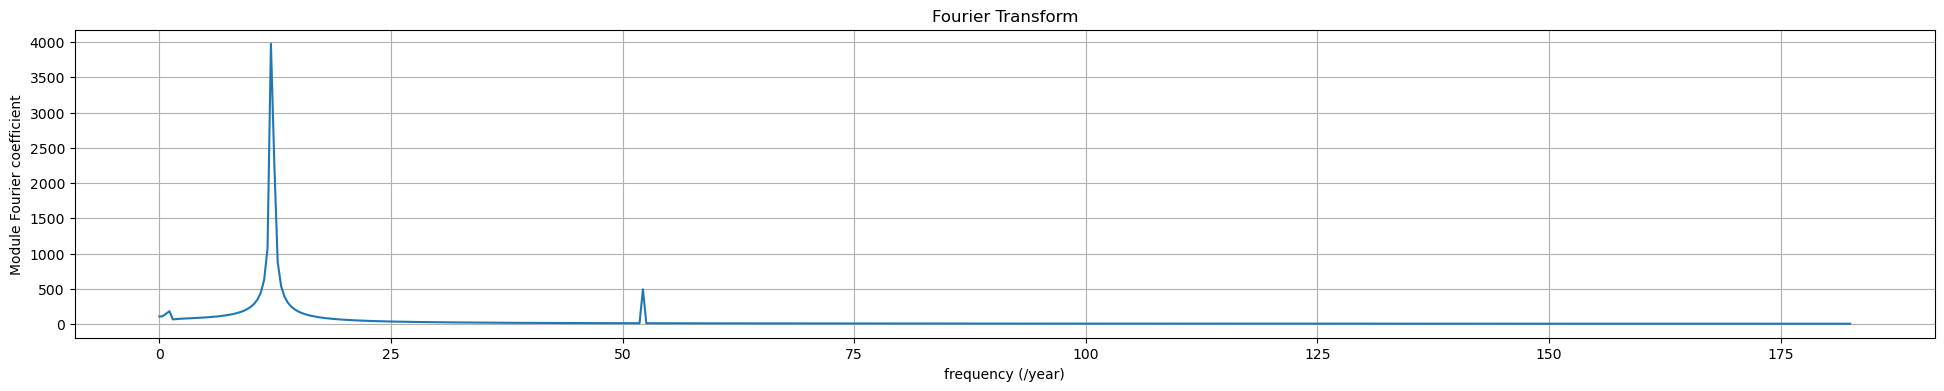

argmax frequency : 12.045 /year
There are 1000 samples at f_sampling = 365 /year
The frequencies are computed between -182.5 and 182.5 /year
Only the physical frequencies are observed up to 182.5 /year
The frequency resolution is fe/N = 0.365 /year


In [53]:
# transformée de Fourier
# NB : rfft et rfftfreq travaillent sur 0:N//2, ie fréquences positives
yf = rfft(x)   # calcule les coefficients complexes 
xf = rfftfreq(N) # calcule les fréquences correspondantes

# xf[k] is the DFT for the physical frequency k*fe/N (with -N/2 <= k <= N/2)
# one can only observe up to fe/2 (Nyquist theorem)
# ===> we observe between -fe/2 and fe/2 with resolution fe/N

fig, ax = plt.subplots(figsize=(24,4))
ax.plot(xf * fe, np.abs(yf))  # Noter le *fe pour retrouver le domaine de fréquence originel, et le module complexe de yf
ax.set_title(f'Fourier Transform')
ax.set_xlabel('frequency (/year)')
ax.set_ylabel('Module Fourier coefficient')
ax.grid(True)
plt.show()

# vérification :-)
print(f'argmax frequency : {xf[np.argmax(np.abs(yf))] * fe} /year')

# shapes
print(f'There are {N} samples at f_sampling = {fe} /year')
print(f'The frequencies are computed between {-fe/2} and {fe/2} /year')
print(f'Only the physical frequencies are observed up to {fe/2} /year')
print(f'The frequency resolution is fe/N = {fe/N} /year')

In [54]:
# Get top frequencies

# concatenate frequencies and their corresponding Fourier coefficients
xf_ = xf * fe
c = np.concatenate([xf_.reshape(-1,1), np.abs(yf).reshape(-1,1)], axis=1)
id_sorted = c[:,1].argsort()[::-1] # sort indices by amplitude of descending order
sorted_frequencies = c[id_sorted]

amplitudes_sorted = sorted_frequencies[:,1]
frequencies_sorted = sorted_frequencies[:,0]

TOP_FQS = 100
for i in range(1,TOP_FQS):
    print(f"Top {i+1} - Frequency: {frequencies_sorted[i]:.4f} /year, Amplitude: {amplitudes_sorted[i]:.2f}")

Top 2 - Frequency: 12.4100 /year, Amplitude: 2284.14
Top 3 - Frequency: 11.6800 /year, Amplitude: 1076.28
Top 4 - Frequency: 12.7750 /year, Amplitude: 878.71
Top 5 - Frequency: 11.3150 /year, Amplitude: 627.06
Top 6 - Frequency: 13.1400 /year, Amplitude: 540.91
Top 7 - Frequency: 52.1950 /year, Amplitude: 492.40
Top 8 - Frequency: 10.9500 /year, Amplitude: 444.89
Top 9 - Frequency: 13.5050 /year, Amplitude: 389.19
Top 10 - Frequency: 10.5850 /year, Amplitude: 346.31
Top 11 - Frequency: 13.8700 /year, Amplitude: 303.07
Top 12 - Frequency: 10.2200 /year, Amplitude: 284.60
Top 13 - Frequency: 14.2350 /year, Amplitude: 247.61
Top 14 - Frequency: 9.8550 /year, Amplitude: 242.40
Top 15 - Frequency: 9.4900 /year, Amplitude: 211.76
Top 16 - Frequency: 14.6000 /year, Amplitude: 208.93
Top 17 - Frequency: 9.1250 /year, Amplitude: 188.54
Top 18 - Frequency: 1.0950 /year, Amplitude: 182.05
Top 19 - Frequency: 14.9650 /year, Amplitude: 180.44
Top 20 - Frequency: 8.7600 /year, Amplitude: 170.37
Top 

### Same signal, period = 1 day

Composing signal of 1000 points sampled at 1 samples/day (=> duration 1000.00 days), with frequencies 1.4e-01, 3.3e-02, 2.7e-03 /day


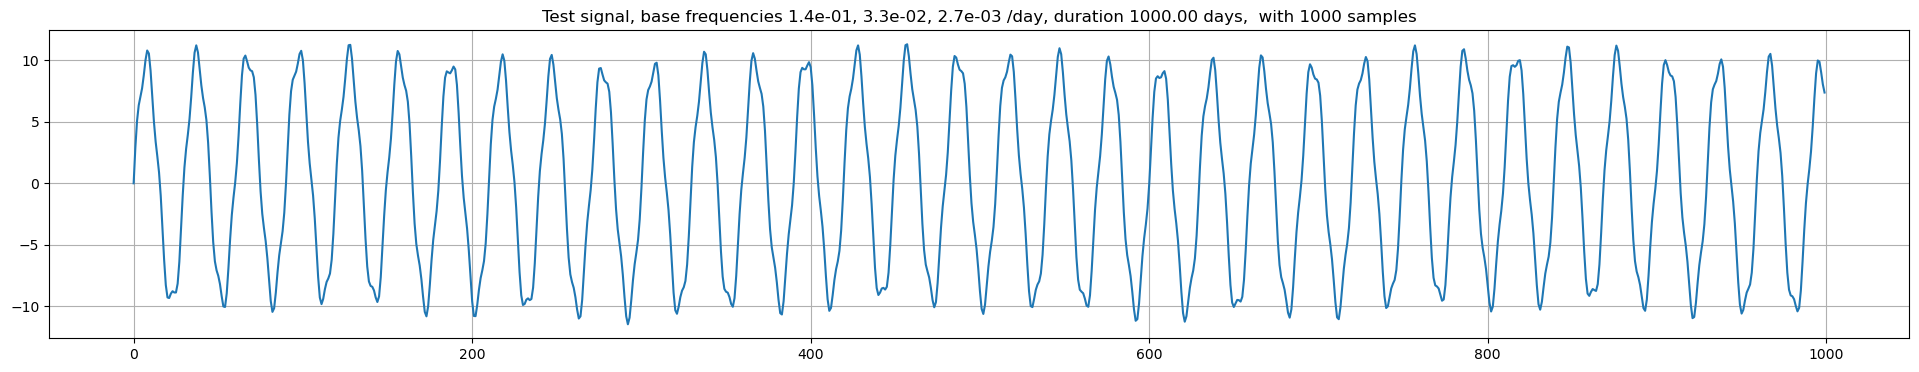

In [57]:
# Example : period = 1 day

# paramètres of the test sinusoïde
N = 1000  # number of samples (N)
fe = 1 # fréquence échantillonage (Hz) : samples per period (here, samples per day)
duration = N/fe  # durée du signal (here, in days)

# generate sinusoïdes
f1, a1 = (1/7), 1 # weekly component (7 days) - ie 1/7 cycles per day
f2, a2 = (1/30), 10  # monthly component (30 days) - ie 1/30 cycles per day
f3, a3 = (1/365), 0.5  # yearly component (365 days) - ie 1/365 per day
ts = np.linspace(start=0, stop=duration, num=N)
x = a1*np.sin(2*np.pi*f1*ts) + a2*np.sin(2*np.pi*f2*ts) + a3*np.sin(2*np.pi*f3*ts)

print(f"Composing signal of {N} points sampled at {fe} samples/day (=> duration {duration:.2f} days), with frequencies {f1:.1e}, {f2:.1e}, {f3:.1e} /day")

# display synthetic signal
fig, ax = plt.subplots(figsize=(24,4))
ax.plot(x)
ax.grid(True)
ax.set_title(f'Test signal, base frequencies {f1:.1e}, {f2:.1e}, {f3:.1e} /day, duration {duration:.2f} days,  with {N} samples')
plt.show()

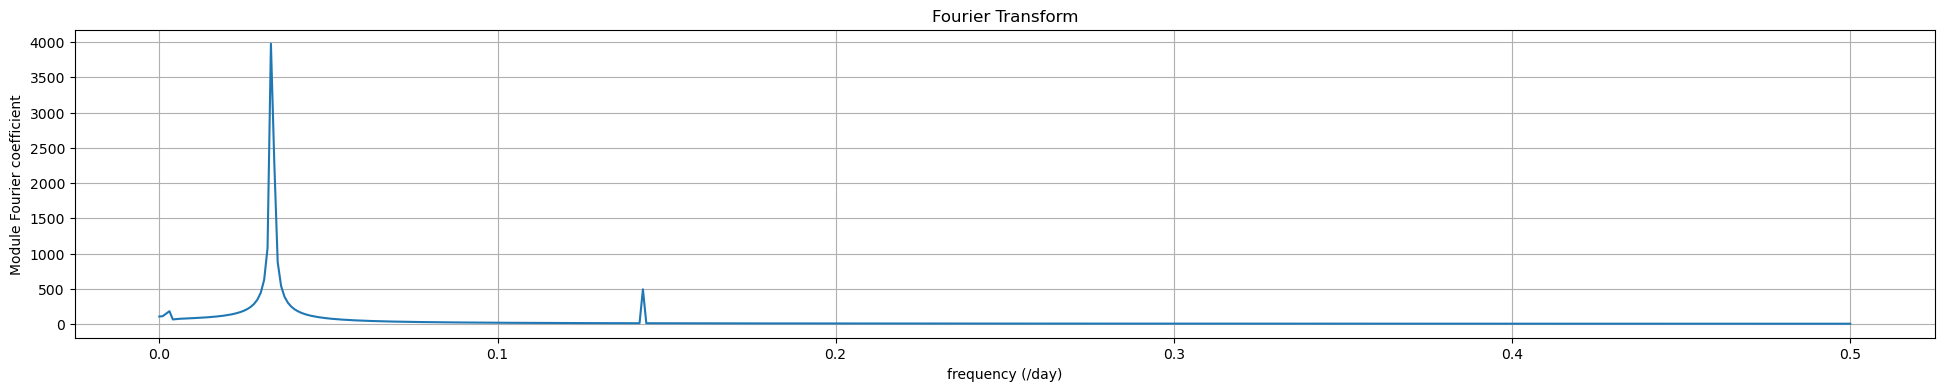

argmax frequency : 0.033 /day
There are 1000 samples at f_sampling = 1 /day
The frequencies are computed between -0.5 and 0.5 /day
Only the physical frequencies are observed up to 0.5 /day
The frequency resolution is fe/N = 0.001 /day


In [58]:
# transformée de Fourier
# NB : rfft et rfftfreq travaillent sur 0:N//2, ie fréquences positives
yf = rfft(x)   # calcule les coefficients complexes 
xf = rfftfreq(N) # calcule les fréquences correspondantes

# xf[k] is the DFT for the physical frequency k*fe/N (with -N/2 <= k <= N/2)
# one can only observe up to fe/2 (Nyquist theorem)
# ===> we observe between -fe/2 and fe/2 with resolution fe/N

fig, ax = plt.subplots(figsize=(24,4))
ax.plot(xf * fe, np.abs(yf))  # Noter le *fe pour retrouver le domaine de fréquence originel, et le module complexe de yf
ax.set_title(f'Fourier Transform')
ax.set_xlabel('frequency (/day)')
ax.set_ylabel('Module Fourier coefficient')
ax.grid(True)
plt.show()

# vérification :-)
print(f'argmax frequency : {xf[np.argmax(np.abs(yf))] * fe} /day')

# shapes
print(f'There are {N} samples at f_sampling = {fe} /day')
print(f'The frequencies are computed between {-fe/2} and {fe/2} /day')
print(f'Only the physical frequencies are observed up to {fe/2} /day')
print(f'The frequency resolution is fe/N = {fe/N} /day')

In [60]:
# Get top frequencies

# concatenate frequencies and their corresponding Fourier coefficients
xf_ = xf * fe
c = np.concatenate([xf_.reshape(-1,1), np.abs(yf).reshape(-1,1)], axis=1)
id_sorted = c[:,1].argsort()[::-1] # sort indices by amplitude of descending order
sorted_frequencies = c[id_sorted]

amplitudes_sorted = sorted_frequencies[:,1]
frequencies_sorted = sorted_frequencies[:,0]

TOP_FQS = 100
for i in range(1,TOP_FQS):
    print(f"Top {i+1} - Frequency: {frequencies_sorted[i]:.4f} /day, (ie {1/frequencies_sorted[i]:.4f} days), Amplitude: {amplitudes_sorted[i]:.2f}")

Top 2 - Frequency: 0.0340 /day, (ie 29.4118 days), Amplitude: 2284.14
Top 3 - Frequency: 0.0320 /day, (ie 31.2500 days), Amplitude: 1076.28
Top 4 - Frequency: 0.0350 /day, (ie 28.5714 days), Amplitude: 878.71
Top 5 - Frequency: 0.0310 /day, (ie 32.2581 days), Amplitude: 627.06
Top 6 - Frequency: 0.0360 /day, (ie 27.7778 days), Amplitude: 540.91
Top 7 - Frequency: 0.1430 /day, (ie 6.9930 days), Amplitude: 492.40
Top 8 - Frequency: 0.0300 /day, (ie 33.3333 days), Amplitude: 444.89
Top 9 - Frequency: 0.0370 /day, (ie 27.0270 days), Amplitude: 389.19
Top 10 - Frequency: 0.0290 /day, (ie 34.4828 days), Amplitude: 346.31
Top 11 - Frequency: 0.0380 /day, (ie 26.3158 days), Amplitude: 303.07
Top 12 - Frequency: 0.0280 /day, (ie 35.7143 days), Amplitude: 284.60
Top 13 - Frequency: 0.0390 /day, (ie 25.6410 days), Amplitude: 247.61
Top 14 - Frequency: 0.0270 /day, (ie 37.0370 days), Amplitude: 242.40
Top 15 - Frequency: 0.0260 /day, (ie 38.4615 days), Amplitude: 211.76
Top 16 - Frequency: 0.0400 

/tmp/ipykernel_18659/2737830602.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"Top {i+1} - Frequency: {frequencies_sorted[i]:.4f} /day, (ie {1/frequencies_sorted[i]:.4f} days), Amplitude: {amplitudes_sorted[i]:.2f}")


### Example speech data

In [12]:
import os

# form path to wav file
filename = './data/devils_trick.wav'
# filename = 'coloniedefourmies.wav'
filepath = os.getcwd() + '/' + filename

# read the wav file
with open(filepath,'rb') as f:
    rate, wavdata = scipy.io.wavfile.read(f)
    
# listen to that outstanding bass voice
ipd.Audio(wavdata, rate=rate)

# 'the biggest trick the devil ever pulled, was convincing people he didn't exist" (Usual suspects)

### Spectral Density

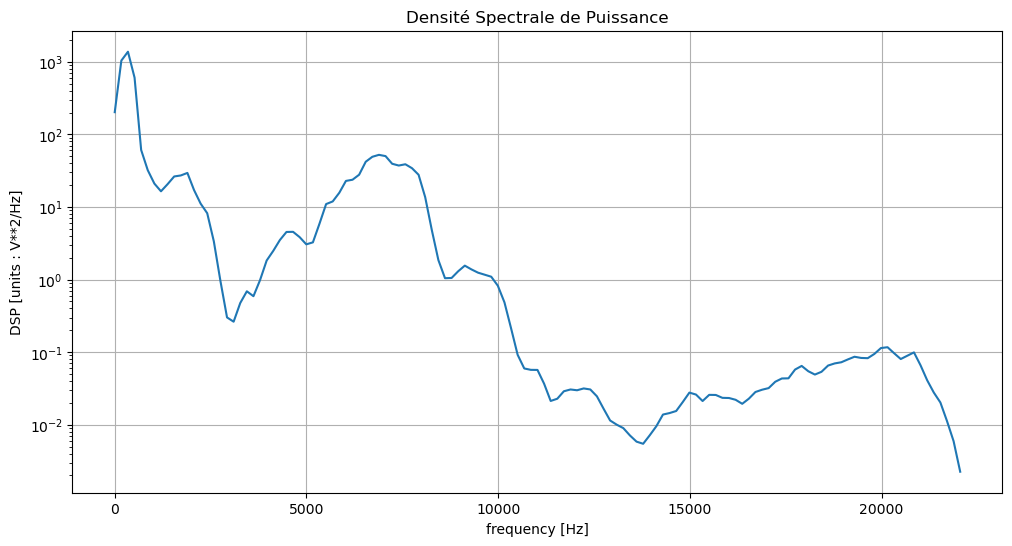

In [13]:
# Densité Spectrale de Puissance
# We have seen that computing the Fourier Transform can be misleading when computed over the entire signal

# welch is a function to calculate DSP
# welch returns 
# f : array of sample frequencies
# dsp : dsp spectrum of signal
from scipy.signal import welch

fe = 44100 # sampling frequency

# calculate DSP
f, dsp = welch(wavdata, fe)

# plot DSP
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(f, dsp)
ax.set_yscale('log')
ax.grid(True)
ax.set_title(f'Densité Spectrale de Puissance')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('DSP [units : V**2/Hz]')

plt.show()